In [1]:
import pandas as pd
df = pd.read_csv("olid-training-v1.0.tsv",sep="\t")


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13240 entries, 0 to 13239
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         13240 non-null  int64 
 1   tweet      13240 non-null  object
 2   subtask_a  13240 non-null  object
 3   subtask_b  4400 non-null   object
 4   subtask_c  3876 non-null   object
dtypes: int64(1), object(4)
memory usage: 517.3+ KB


In [3]:
df.head()

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN


In [4]:
df.sample(10)

,id,tweet,subtask_a,subtask_b,subtask_c
10901,16498,@USER Copycat,NOT,NaN,NaN
5323,96433,@USER @USER @USER @USER NICELY SAID MR.REDWOOD...,NOT,NaN,NaN
8456,81160,@USER How about as a Republic?,NOT,NaN,NaN
10872,89747,@USER @USER is anything but an independent thi...,NOT,NaN,NaN
11557,99331,@USER But with an active membership in Antifa...,NOT,NaN,NaN
12527,57449,@USER @USER The Republicans are against Nancy ...,NOT,NaN,NaN
7924,55703,@USER @USER @USER @USER @USER @USER @USER @USE...,NOT,NaN,NaN
5471,24698,And there we go ... so according to the MAGA b...,OFF,TIN,GRP
4292,58613,".@USER I'm not installing your shitty app, but...",OFF,TIN,GRP
5971,52788,@USER Did he found out by himself?,NOT,NaN,NaN


In [5]:
df.shape

(13240, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13240 entries, 0 to 13239
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         13240 non-null  int64 
 1   tweet      13240 non-null  object
 2   subtask_a  13240 non-null  object
 3   subtask_b  4400 non-null   object
 4   subtask_c  3876 non-null   object
dtypes: int64(1), object(4)
memory usage: 517.3+ KB


In [7]:
df.shape   # number of rows and column 

(13240, 5)

In [8]:
# check for missing values 
df.isnull().sum()

id              0
tweet           0
subtask_a       0
subtask_b    8840
subtask_c    9364
dtype: int64

In [ ]:
# Replace NaN in subtask_b and subtask_c with "NIL"
df['subtask_b'] = df['subtask_b'].fillna("non offensive tweets")
df['subtask_c'] = df['subtask_c'].fillna("non targeted tweets")


In [9]:
df.isnull().sum()

id              0
tweet           0
subtask_a       0
subtask_b    8840
subtask_c    9364
dtype: int64

In [10]:
print(df.columns)

Index(['id', 'tweet', 'subtask_a', 'subtask_b', 'subtask_c'], dtype='object')


subtask_a
NOT    8840
OFF    4400
Name: count, dtype: int64


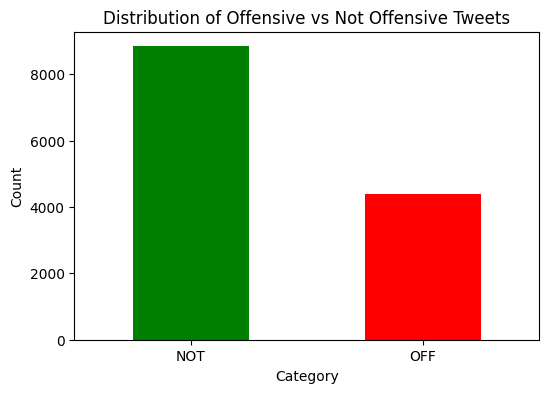

In [11]:
# checking how many tweets are offencive or not 
import matplotlib.pyplot as plt

counts = df['subtask_a'].value_counts()
print(counts)
plt.figure(figsize=(6,4))
counts.plot(kind='bar', color=['green','red'])

plt.title("Distribution of Offensive vs Not Offensive Tweets")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

subtask_b
TIN    3876
UNT     524
Name: count, dtype: int64


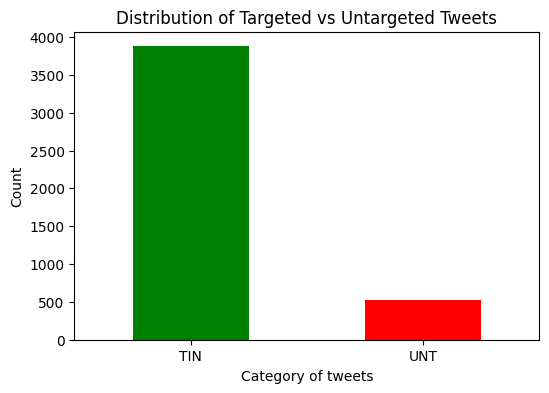

In [12]:
# if tweets are offencive then checking how many are targeted and non targeted
print(df['subtask_b'].value_counts())
plt.figure(figsize=(6,4))
df['subtask_b'].value_counts().plot(kind='bar', color=['green','red'])

plt.title("Distribution of Targeted vs Untargeted Tweets")
plt.xlabel("Category of tweets")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

subtask_c
IND    2407
GRP    1074
OTH     395
Name: count, dtype: int64


Text(0.5, 1.0, 'Targeted tweets')

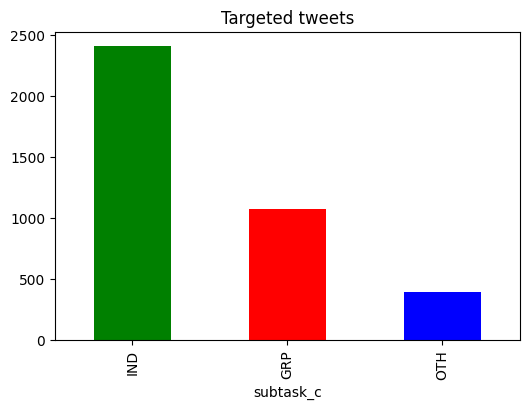

In [13]:
# if tweets are targeted then check who is targeted?
print(df['subtask_c'].value_counts())
plt.figure(figsize=(6,4))
df['subtask_c'].value_counts().plot(kind='bar', color=['green','red','blue'])

plt.title('Targeted tweets')

In [14]:
# New column with character length of each tweet
df['tweet_length'] = df['tweet'].apply(len)


print(df['tweet_length'].describe())


count    13240.000000
mean       125.908459
std         86.625831
min         10.000000
25%         55.000000
50%        102.000000
75%        185.000000
max        580.000000
Name: tweet_length, dtype: float64


In [ ]:
# plt.figure(figsize=(6,4))
# df['tweet_length'].plot(kind='bar', color=['green','red','blue'])

# plt.title("Who is targeted")
# plt.xlabel("Category")
# plt.ylabel("Count")
# plt.xticks(rotation=0)
# plt.show()

In [ ]:
df.columns

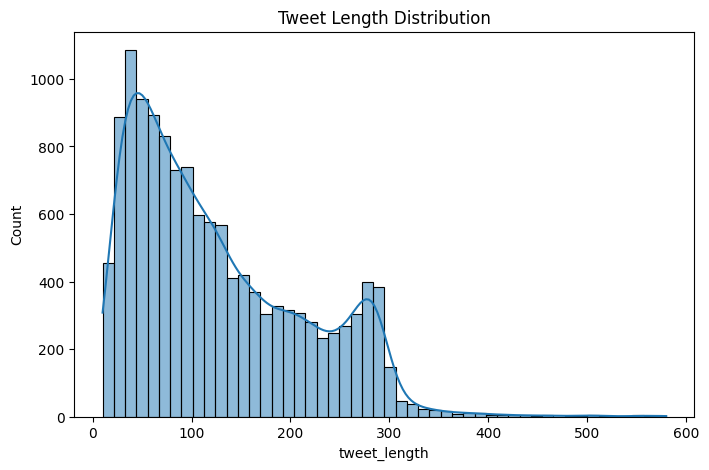

In [15]:
import seaborn as sns

# Distribution of Tweet Length
plt.figure(figsize=(8,5))
sns.histplot(df["tweet_length"], bins=50, kde=True)
plt.title("Tweet Length Distribution")
plt.show()

# histplot decribes the data distribution (like how many values in that particular range)

In [16]:
# Correlation of tweet length with targets
print(df.groupby("subtask_a")["tweet_length"].mean())
print(df.groupby("subtask_b")["tweet_length"].mean())
print(df.groupby("subtask_c")["tweet_length"].mean())


subtask_a
NOT    122.687557
OFF    132.379545
Name: tweet_length, dtype: float64
subtask_b
TIN    135.910733
UNT    106.259542
Name: tweet_length, dtype: float64
subtask_c
GRP    162.309125
IND    122.453677
OTH    146.136709
Name: tweet_length, dtype: float64
